# Project 1: Standardized Testing, Statistical Summaries and Inference

In this project we will be aggregating SAT and ACT scores and participation rates from each state in the United States. We'll be identifying trend in the data and combine the data analysis with domain reserach to identify likely factors influencing participation rates and scores in various states.
## Problem Statement

The College Board that administers the SAT - wants to tracks statewide participation and recommends where money is best spent to improve SAT participation rates. 

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

from scipy.stats import normaltest, skew
import scipy.stats as stats


sns.set_style('whitegrid')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
#Provided csv file below
sat = pd.read_csv("data/sat_2017.csv")

#CSV pulled from the following website: https://magoosh.com/hs/sat/sat-scores/2018/average-sat-scores-by-state-how-does-your-state-stack-up/
sat_web = pd.read_csv('data/sat.website.csv')

#Provided csv file below
act = pd.read_csv("data/act_2017.csv")

#CSV pulled from the following website: https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows
act_web = pd.read_csv('data/act.website.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [ ]:
# act_web.info()
# act_web.head(10)
# act_web.describe()

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: To begin with, SAT data provides the average score for each state, participation, evidance-based reading and writting, math and total for each state.
On the other hand, ACT provides the participation, average score for english, math, reading, science and composite.

#### 4a. Does the data look complete? 

Answer: In both the dataset, the rows are greater than 50 rows which means that they have included all the states. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: In the SAT dataset, Math has a minimum of 52 which is not possible. Whereas in ACT, Math also has minimum of 2.3 which is also questionable. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
#SAT data has a minimum of 52, which is not possible. Will be correcting that in the following code. 
sat[sat.Math ==52]
sat.iloc[20,3] = 524
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
#Fixing ACT dataset. Changing the min from 2.3 to 23.2S
act[act.Science ==2.3]
act.iloc[21,5] = 23.2
act.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:  
In SAT, participation is an object, instead it should be a float. They are probably objects becuase of the pecentage sign.  
On the other hand, participation and composite in ACT are objects, whereas it would be logical to have both of them as float. . 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [10]:
#code
#Removed the "," from participation
sat['Participation'] = sat['Participation'].apply(lambda p: p.replace("%", ""))
act['Participation'] = act['Participation'].apply(lambda a: a.replace("%", ""))

In [11]:
# act[act['Composite'] != type(int)]
# act['Composite'].str.isnumeric()
act['Composite'] = act['Composite'].apply(lambda c: c.replace('x',''))

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
sat['Participation'] = sat['Participation'].astype(float)
act['Participation'] = act['Participation'].astype(float)
act['Composite'] = act['Composite'].astype(float)

In [13]:
#code

- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


- Display the data types again to confirm they are correct.

In [15]:
#Code:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
#code
sat_new_columns_dict ={
    'State': 'state', 
    'Participation': 'sat_parti_17', 
    'Evidence-Based Reading and Writing': 'EBRW', 
    'Math': 'sat_math_17',
    'Total': 'sat_total_17'
}
sat = sat.rename(columns = sat_new_columns_dict)

act_new_columns_dict ={
    'State': 'state', 
    'Participation': 'act_parti_17', 
    'English':'act_eng_17', 
    'Math':'act_math_17', 
    'Reading':'act_read_17', 
    'Science': 'act_sci_17',
    'Composite': 'act_composite_17'
}
act = act.rename(columns = act_new_columns_dict)


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT 2017|Names the of the state|
|sat_parti_17|float|SAT 2017|SAT participation rate for the given state|
|EBRW|int|SAT 2017|Average Evidence-Based Reading Writing, Average SAT EBRW score for each score|
|sat_math_17|int|SAT 2017|Average SAT math score for each state|
|sat_total_17|int|SAT 2017|Average SAT total for each state|
|act_parti_17|float|ACT 2018|ACT participation rate for the given state|
|act_eng_17|float|ACT 2017|Average ACT english score for each state|
|act_math_17|float|ACT 2017|Average ACT math score for each state|
|act_read_17|float|ACT 2017|Average ACT reading score for each state|
|act_sci_17|float|ACT 2017|Average ACT science score for each state|
|act_composite_17|float|ACT 2017|Average ACT composite score for each state|

In [17]:
act.head()
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state               52 non-null object
act_parti_17        52 non-null float64
act_eng_17          52 non-null float64
act_math_17         52 non-null float64
act_read_17         52 non-null float64
act_sci_17          52 non-null float64
act_composite_17    52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
#code
act.head()
#Upon inspection, found out that act has a row for national standing. Will be removing this row. 
act = act.set_index('state')
act.head()

,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_composite_17
state,,,,,,
National,60.0,20.3,20.7,21.4,21.0,21.0
Alabama,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,65.0,18.7,19.8,20.4,19.9,19.8
Arizona,62.0,18.6,19.8,20.1,19.8,19.7
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [19]:
act = act.drop('National', axis = 0)

In [20]:
act = act.reset_index()
act.head()

,state,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_composite_17
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
combined_17 = pd.merge(sat,act, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
combined_17.to_csv('Combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [26]:
#code
sat_18 = pd.read_csv('data/sat_2018.csv', encoding = "ISO-8859-1")

#Participation Rate is an object. Changing it to int
sat_18['Participation Rate'] = sat_18['Participation Rate'].apply(lambda p: p.replace("%", ""))
sat_18.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [27]:
try:
    sat_18['Participation Rate'] = sat_18['Participation Rate'].astype(float)
except ValueError:
    sat_18['Participation Rate'] = sat_18['Participation Rate'].replace('Ñ', np.nan)

sat_18['Participation Rate'] = sat_18['Participation Rate'].astype(float)

In [28]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
State                 53 non-null object
Participation Rate    51 non-null float64
EBRW                  53 non-null int64
Math                  53 non-null int64
Total                 53 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [30]:
act_18 = pd.read_csv('data/act_2018.csv')
act_18.head(10)

#Dropped the row with all NaN values. Found the row in act_18.head()
act_18 = act_18.dropna(axis = 0, how = 'all')
#
act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].apply(lambda p: p.replace("Not given", ""))


#The dataframe also had a state "National". Dropped that row too. 
act_18[act_18['State'] == 'National']
act_18 = act_18.set_index('State')
act_18.drop('National', axis = 0)
act_18 = act_18.reset_index()


In [31]:
try:
    act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].astype(float)
except ValueError:
    act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].replace('', np.nan)
act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].astype(float)
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State                            52 non-null object
Percentage of Students Tested    47 non-null float64
Average Composite Score          52 non-null float64
Average English Score            52 non-null float64
Average Math Score               52 non-null float64
Average Reading Score            52 non-null float64
Average Science Score            52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [32]:
#Renaming the column names to make it consistant with the existing csv
sat_new_columns_dict ={
    'State': 'state', 
    'Participation Rate': 'sat_parti_18', 
    'Evidence-Based Reading and Writing': 'EBRW_18', 
    'Math': 'sat_math_18',
    'Total': 'sat_total_18'
}
sat_18 = sat_18.rename(columns = sat_new_columns_dict)

act_new_columns_dict ={
    'State': 'state', 
    'Percentage of Students Tested': 'act_parti_18', 
    'Average English Score':'act_eng_18', 
    'Average Math Score':'act_math_18', 
    'Average Reading Score':'act_read_18', 
    'Average Science Score': 'act_sci_18',
    'Average Composite Score': 'act_composite_18'
}
act_18 = act_18.rename(columns = act_new_columns_dict)


In [33]:
sat_18.head(2)

,state,sat_parti_18,EBRW,sat_math_18,sat_total_18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106


In [34]:
act_18.head(2)

,state,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [35]:
combined_18 = pd.merge(sat_18,act_18, on='state', how = 'inner')
final = pd.merge(combined_17,combined_18, on = 'state',how = 'inner')

final.info()
final.to_csv('final.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state               51 non-null object
sat_parti_17        51 non-null float64
EBRW_x              51 non-null int64
sat_math_17         51 non-null int64
sat_total_17        51 non-null int64
act_parti_17        51 non-null float64
act_eng_17          51 non-null float64
act_math_17         51 non-null float64
act_read_17         51 non-null float64
act_sci_17          51 non-null float64
act_composite_17    51 non-null float64
sat_parti_18        51 non-null float64
EBRW_y              51 non-null int64
sat_math_18         51 non-null int64
sat_total_18        51 non-null int64
act_parti_18        47 non-null float64
act_composite_18    51 non-null float64
act_eng_18          51 non-null float64
act_math_18         51 non-null float64
act_read_18         51 non-null float64
act_sci_18          51 non-null float64
dtypes: float64(14), int64(6), object(1)
memory usage: 8.8+ KB


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_parti_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
EBRW_x,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_parti_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_eng_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_read_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_sci_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [37]:
def std(x):
    return (np.sum(np.mean((x-np.mean(x))**2)))**0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}

In [38]:
{i: round(std(final[i]),2) for i in final.columns[1:]}

{'sat_parti_17': 34.93,
 'EBRW_x': 45.22,
 'sat_math_17': 46.66,
 'sat_total_17': 91.58,
 'act_parti_17': 31.82,
 'act_eng_17': 2.33,
 'act_math_17': 1.96,
 'act_read_17': 2.05,
 'act_sci_17': 1.72,
 'act_composite_17': 2.0,
 'sat_parti_18': 37.64,
 'EBRW_y': 44.87,
 'sat_math_18': 48.73,
 'sat_total_18': 93.51,
 'act_parti_18': 33.2,
 'act_composite_18': 2.09,
 'act_eng_18': 2.42,
 'act_math_18': 2.02,
 'act_read_18': 2.15,
 'act_sci_18': 1.85}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [39]:
final.describe()

,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_composite_17,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,47.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,46.627451,567.294118,557.470588,1125.294118,60.085106,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,38.014187,45.317676,49.213963,94.442214,33.561643,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,535.000000,521.500000,1062.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,547.000000,1099.000000,65.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,79.500000,616.500000,600.500000,1229.500000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


Answer:
The manually standard deviation does not match up with the output of the final.describe().

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Participation Rate for 2017 - 2018

#### North Dakota, Mississippi and Iowa have the lowest participation rate for SAT 2017. They all have participation rate of 2%.
#### On the other hand, District of Columbia, Michigan, Connecticut and Delaware have participation rate of 100% for SAT 2017. 

In [40]:
#code
final.sort_values(by=['sat_parti_17']).head()
final.sort_values(by=['sat_parti_17'], ascending = False).head()

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32.0,23.6,23.7,22.7,24.4,23.0
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,25.1,24.7,25.6,24.4


#### With only 2% participation rate, North Dakota has the lowest participation rate for SAT 2018. On the other hand, Colorado, Connecticut, Delaware, Michigan and Idaho have the highest participation rate, that is 100%

In [41]:
# final.sort_values(by=['sat_parti_18']).head()
final.sort_values(by=['sat_parti_18'],ascending=False).head(6)

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36.0,22.3,21.9,21.6,23.2,22.1
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4


#### With only 8%, Maine has the lowest participation rate for ACT 2017. 
#### On the other hand, the following 17 states have participation rate of 100% for ACT 2017: Alabama, Kentucky, Winconsin, Utah, Tennessee, South Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Oklahoma, North Carolina, Wyoming, Colorado and Arkansas. 

In [42]:
final.sort_values(by=['act_parti_17']).head()
# final.sort_values(by=['act_parti_17'],ascending=False).head(19)

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15.0,24.2,24.4,23.6,25.0,23.5
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,...,70.0,547,539,1086,NaN,23.5,23.3,23.2,24.0,23.1


#### With only 7%, Maine has the lowest participation rate for ACT 2018. 
#### On the other hand, the following 14 states have participation rate of 100% for ACT 2018: Alabama, Kentucky, Winconsin, Utah, Tennessee, South Carolina,Ohio, Nevada, Nebraska, Montana, Missouri, Mississippi, Wyoming and Arkansas. 

In [43]:
final.sort_values(by=['act_parti_18']).head()
# final.sort_values(by=['act_parti_18'],ascending=False).head(15)

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15.0,24.2,24.4,23.6,25.0,23.5
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,25.1,24.7,25.6,24.4
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9


#### District of Columbia has the lowest SAT total in 2017. The average total is 950. 
#### Minnesota on the other hand, has the highest score of 1295 out of all the states. 

In [44]:
# final.sort_values(by=['sat_total_17']).head()
final.sort_values(by=['sat_total_17'], ascending = False).head()

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,...,4.0,643,655,1298,99.0,21.3,20.2,21.4,21.7,21.4
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,632,1265,68.0,21.8,21.0,21.2,22.5,22.0
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,...,4.0,633,629,1262,100.0,20.0,19.5,19.7,20.5,20.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71.0,21.6,21.0,21.1,22.3,21.5


#### In 2018, District of Columbia has the lowest score again, with an average of only 977. 
#### With an average score of 1298, Minnesota again got the highest score among all the states. 

In [45]:
final.sort_values(by=['sat_total_18']).head()
final.sort_values(by=['sat_total_18'], ascending = False).head()

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,...,4.0,643,655,1298,99.0,21.3,20.2,21.4,21.7,21.4
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98.0,20.3,19.1,20.3,20.7,20.5
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,632,1265,68.0,21.8,21.0,21.2,22.5,22.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71.0,21.6,21.0,21.1,22.3,21.5


#### With the average score of 17.8, the state of Nevada has the lowest score for ACT 2017. On the other hand, with 25.5 average score, New Hampshire has the highest score for ACT 2017

In [46]:
#Cannot see the values of following code, therefore would be making act_composite_17 the index to see the values. 
raw_final = final.copy()
raw_final = raw_final.sort_values(by=['act_composite_17'])
raw_final = raw_final.set_index('act_composite_17')

In [47]:
#Cannot see the values of following code, therefore would be making act_composite_17 the index to see the values. 
raw_final = final.copy()
raw_final = raw_final.sort_values(by=['act_composite_17'], ascending= False)
raw_final = raw_final.set_index('act_composite_17')
final.head(2)

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7


#### In ACT 2018, Nevada got the lowest aveage composite of 17.7. Whereas, Connecticut got the highest average composite of 25.6.

In [48]:
raw_final = final.copy()
raw_final.sort_values(by=['act_composite_18']).head()
raw_final.sort_values(by=['act_composite_18'], ascending = False).head()
final.head(2)

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7


#### In 2017, Oregon has less than 50% of participation rate on both the tests. 

In [49]:
final[(final['sat_parti_17'] < 50) & (final['act_parti_17'] < 50)]

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
37,Oregon,43.0,560,548,1108,40.0,21.2,21.5,22.4,21.7,...,48.0,564,553,1117,42.0,21.3,20.6,20.9,21.9,21.1


#### Do any states with 100% participation on a given test have a rate change year-to-year?

In [50]:
final.head(2)

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7


#### In 2018, Oregon and Alaska both have less than 50% participation rate on both of the tests. 

In [51]:
final[(final['sat_parti_18'] < 50) & (final['act_parti_18'] < 50)]

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
37,Oregon,43.0,560,548,1108,40.0,21.2,21.5,22.4,21.7,...,48.0,564,553,1117,42.0,21.3,20.6,20.9,21.9,21.1


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

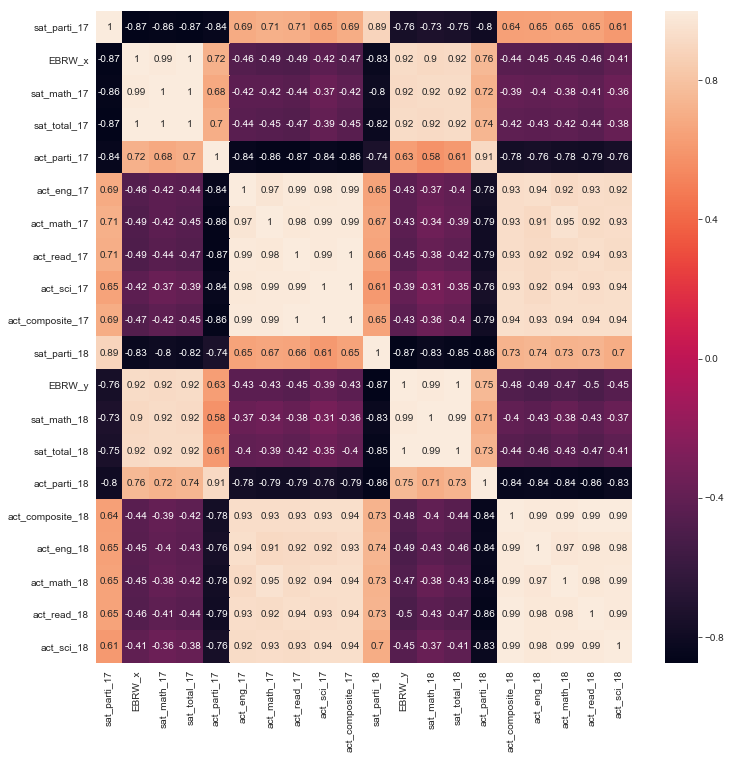

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(final.corr(), annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [53]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10))  
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

C:\Users\m_mas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\m_mas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


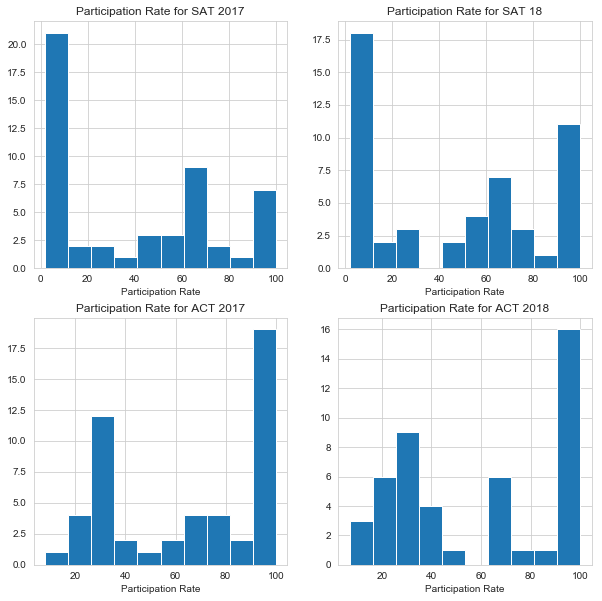

In [54]:
# Participation rates for SAT & ACT
subplot_histograms(final, 
                   ['sat_parti_17','sat_parti_18','act_parti_17','act_parti_18'],
                   ['Participation Rate for SAT 2017','Participation Rate for SAT 18', 'Participation Rate for ACT 2017', 'Participation Rate for ACT 2018'],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate']);

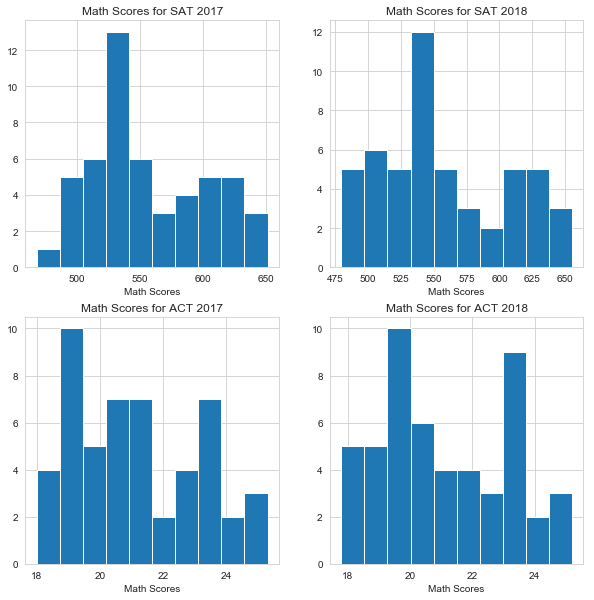

In [55]:
#Math scores for SAT & ACT
subplot_histograms(final, 
               ['sat_math_17','sat_math_18','act_math_17','act_math_18'],
               ['Math Scores for SAT 2017','Math Scores for SAT 2018', 'Math Scores for ACT 2017', 'Math Scores for ACT 2018'],
               ['Math Scores','Math Scores','Math Scores','Math Scores']);

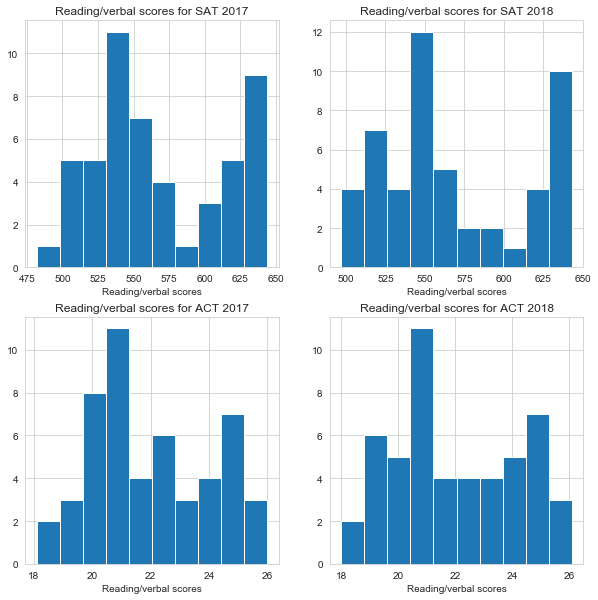

In [56]:
#Reading/verbal scores for SAT & ACT
subplot_histograms(final, 
               ['EBRW_x','EBRW_y','act_read_17','act_read_18'],
               ['Reading/verbal scores for SAT 2017','Reading/verbal scores for SAT 2018', 'Reading/verbal scores for ACT 2017', 'Reading/verbal scores for ACT 2018'],
               ['Reading/verbal scores','Reading/verbal scores','Reading/verbal scores','Reading/verbal scores']);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [57]:
def splot(dataframe, x, y, title, xlabels, ylabels):
    plt.figure(figsize=(10,5))
    plt.scatter(dataframe[x],dataframe[y]);
    plt.title(title ,fontsize = 12)
    plt.ylabel(ylabels, fontsize = 12)
    plt.xlabel(xlabels, fontsize = 12)  

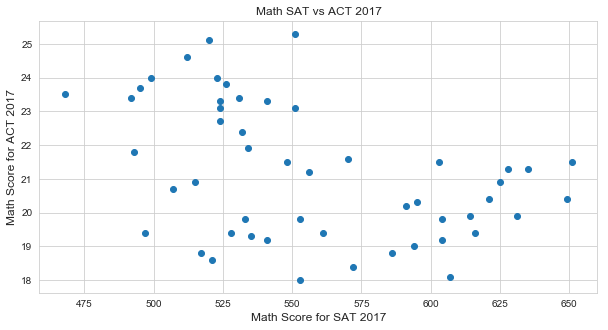

In [58]:
#SAT vs. ACT math scores for 2017
splot(dataframe = final,x = 'sat_math_17',y = 'act_math_17',xlabels = 'Math Score for SAT 2017', ylabels = 'Math Score for ACT 2017', title = 'Math SAT vs ACT 2017')

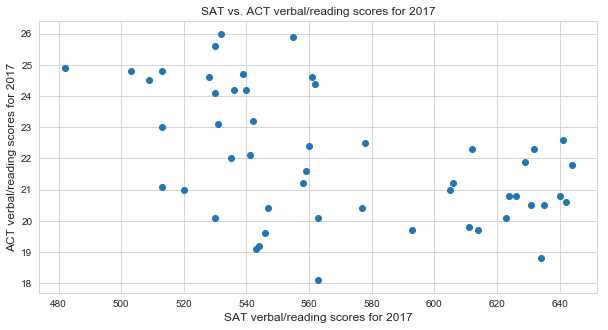

In [59]:
#SAT vs. ACT verbal/reading scores for 2017
splot(dataframe = final,x = 'EBRW_x',y = 'act_read_17',xlabels = 'SAT verbal/reading scores for 2017', ylabels = 'ACT verbal/reading scores for 2017', title = 'SAT vs. ACT verbal/reading scores for 2017')

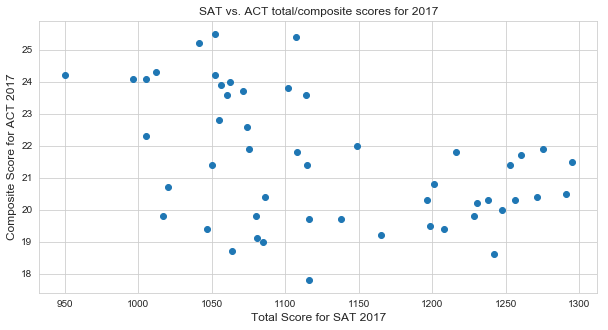

In [60]:
# SAT vs. ACT total/composite scores for 2017
splot(dataframe = final,x = 'sat_total_17',y = 'act_composite_17',xlabels = 'Total Score for SAT 2017', ylabels = 'Composite Score for ACT 2017', title = 'SAT vs. ACT total/composite scores for 2017')

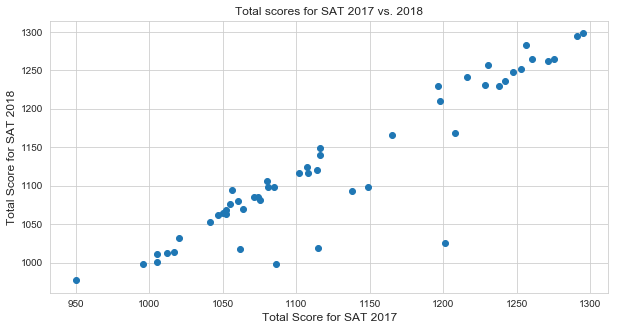

In [61]:
# Total scores for SAT 2017 vs. 2018
splot(dataframe = final,x = 'sat_total_17',y = 'sat_total_18',xlabels = 'Total Score for SAT 2017', ylabels = 'Total Score for SAT 2018', title = 'Total scores for SAT 2017 vs. 2018')

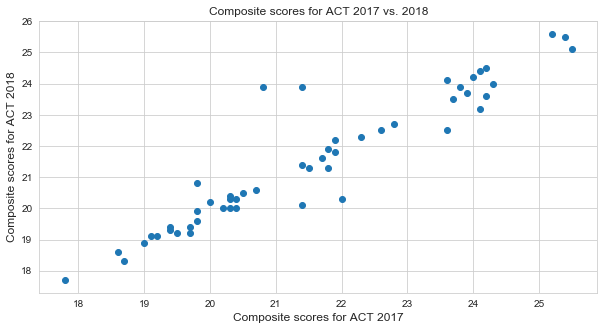

In [62]:
# Composite scores for ACT 2017 vs. 2018
splot(dataframe = final,x = 'act_composite_17',y = 'act_composite_18',xlabels = 'Composite scores for ACT 2017', ylabels = 'Composite scores for ACT 2018', title = 'Composite scores for ACT 2017 vs. 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

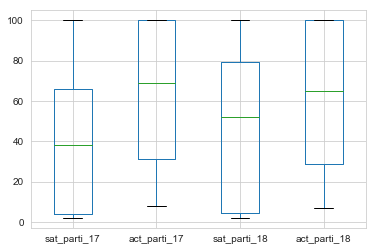

In [63]:
# Code
final_boxplot = final.boxplot(column=['sat_parti_17','act_parti_17','sat_parti_18','act_parti_18'])
 

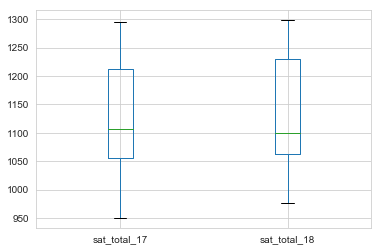

In [64]:
final_boxplot = final.boxplot(column=['sat_total_17','sat_total_18'])

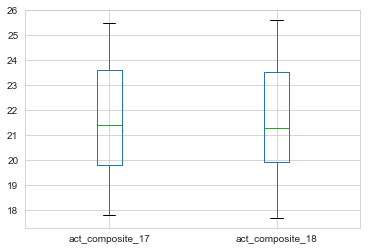

In [65]:
final_boxplot = final.boxplot(column=['act_composite_17','act_composite_18'])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [66]:
numeric_columns = ['sat_math_17','sat_math_18','EBRW_x','EBRW_y','act_eng_17','act_eng_18','act_math_17','act_math_18','act_read_17','act_read_18','act_sci_17','act_sci_18']

In [67]:
for col in numeric_columns:
    norm_pvalue = normaltest(final[col]).pvalue # do a normal test, return p value
    col_skew = skew(final[col]) # do the skew test
    if norm_pvalue < .05: 
        print('{} is not normally distributed since the pvalue {} is less than .05. The skew is {}\n'
              .format(col.upper(), round(norm_pvalue,2), round(col_skew,2)))
    else:
        print('{} is normally distributed since the pvalue {} is greater than .05. The skew is {}\n'
              .format(col.upper(), round(norm_pvalue,2), round(col_skew,2)))

SAT_MATH_17 is normally distributed since the pvalue 0.06 is greater than .05. The skew is 0.35

SAT_MATH_18 is not normally distributed since the pvalue 0.05 is less than .05. The skew is 0.42

EBRW_X is not normally distributed since the pvalue 0.0 is less than .05. The skew is 0.26

EBRW_Y is not normally distributed since the pvalue 0.0 is less than .05. The skew is 0.35

ACT_ENG_17 is normally distributed since the pvalue 0.08 is greater than .05. The skew is 0.34

ACT_ENG_18 is not normally distributed since the pvalue 0.01 is less than .05. The skew is 0.36

ACT_MATH_17 is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.32

ACT_MATH_18 is not normally distributed since the pvalue 0.01 is less than .05. The skew is 0.26

ACT_READ_17 is not normally distributed since the pvalue 0.04 is less than .05. The skew is 0.26

ACT_READ_18 is not normally distributed since the pvalue 0.01 is less than .05. The skew is 0.2

ACT_SCI_17 is normally distributed si

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

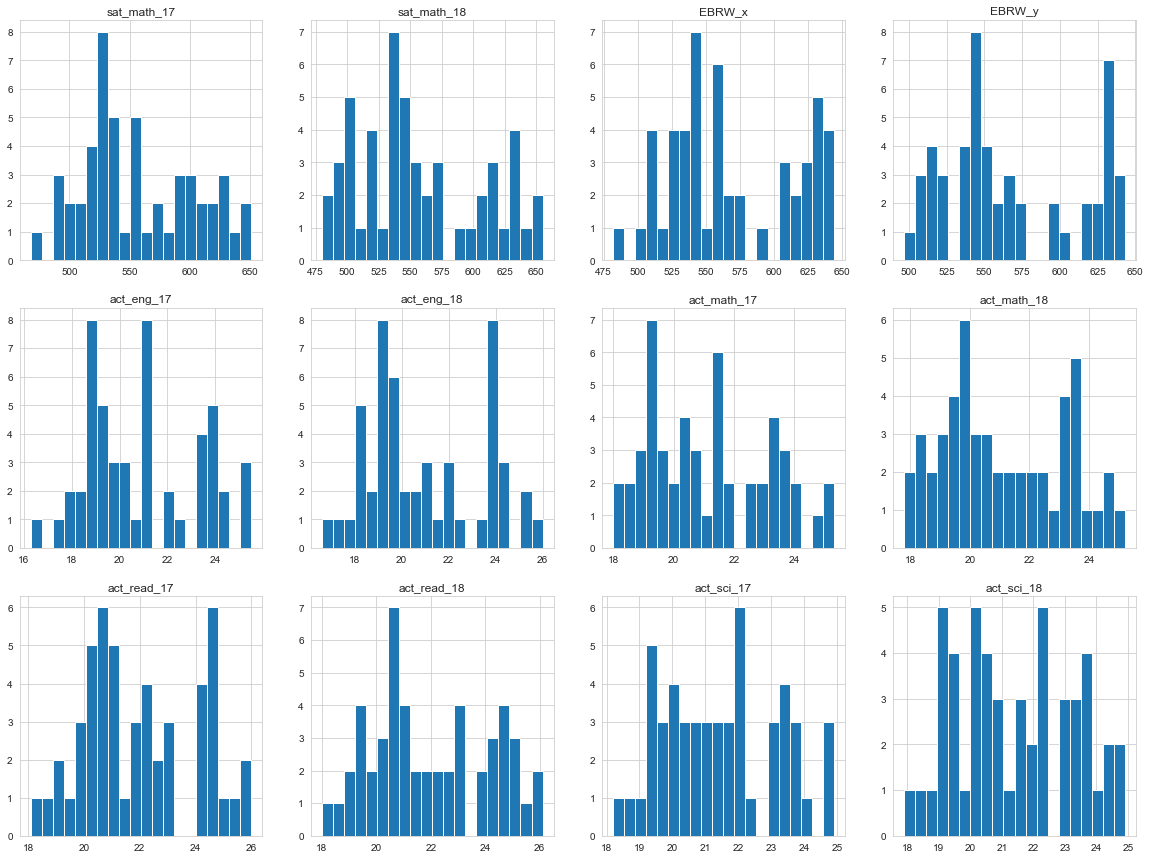

In [68]:
fig = plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_columns): # for index and column name 
    fig.add_subplot(3,4,1+i) # create subplots, use index to increment 
    col_data = final[col]
    plt.hist(col_data, bins=20)
    plt.title(col)

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

#### In the below choropleth maps, you can see that there is a relationship between SAT and ACT participation rates in 2017. The maps demonstrates that the higher participation rate in SAT, could result in lower participation rate in ACT and vice versa. 

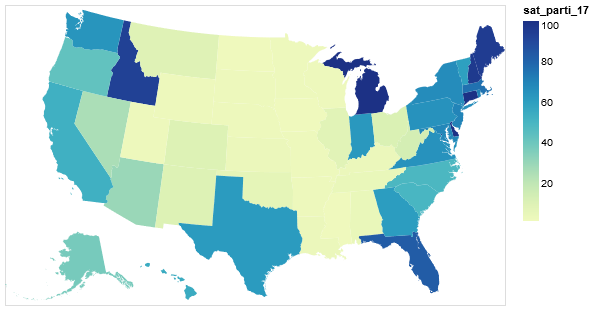

In [69]:
pop = data.population_engineers_hurricanes()
pop = pd.merge(pop,final, on = 'state',how = 'inner')
pop.drop(["engineers", 'hurricanes'], axis = 1)
states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    color='sat_parti_17:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop, 'id', list(pop.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

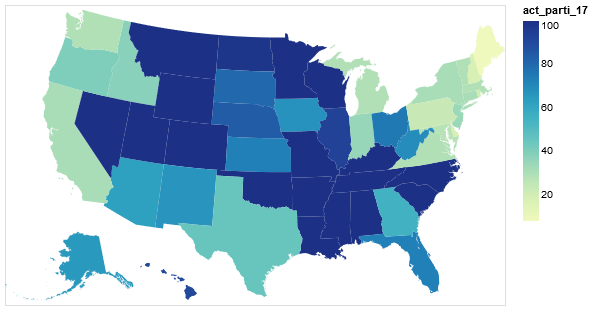

In [70]:
alt.Chart(states).mark_geoshape().encode(
    color='act_parti_17:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop, 'id', list(pop.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: There is a relationship between SAT and ACT math scores. Higher SAT Math Score could result in lower ACT Math Score and vice versa. It is evident in the scatter plot that was done earlier. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

#### H0: There is no difference between the participation rates for SAT and ACT.
#### H1: There is a difference between the participation rates for SAT and ACT.

In [71]:
t_stat, p_value = stats.ttest_ind(final['sat_parti_17'], final['act_parti_17'])
p_value

0.00024134203698662353

#### As the p-value generated about is less than the threshold(0.05), the null hypothesis would rejected. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [72]:
#Very close participation rate for both the test. 
final[final['sat_parti_17'] > 60]

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32.0,23.6,23.7,22.7,24.4,23.0
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36.0,22.3,21.9,21.6,23.2,22.1
14,Indiana,63.0,542,532,1074,35.0,22.0,22.4,23.2,22.3,...,67.0,546,539,1086,32.0,22.5,21.9,22.3,23.1,22.2
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4
20,Maryland,69.0,536,524,1060,28.0,23.3,23.1,24.2,23.2,...,76.0,545,535,1080,31.0,22.5,22.1,22.0,23.1,22.2
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25.0,25.5,25.5,25.2,25.9,24.7


In [73]:
final[final['act_parti_17'] >= 60]

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66.0,19.9,19.2,19.3,21.1,19.5
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,550,549,1099,89.0,18.9,18.2,19.0,19.1,19.0
13,Illinois,9.0,559,556,1115,93.0,21.0,21.2,21.6,21.3,...,99.0,513,506,1019,43.0,23.9,24.1,23.4,24.2,23.4
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,632,1265,68.0,21.8,21.0,21.2,22.5,22.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,...,4.0,633,631,1265,71.0,21.6,21.0,21.1,22.3,21.5


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#### There are 19 states with SAT participation rate of 60% or greater. Whereas there are 30 states with ACT participation rate of 60% of more.The board should give scholarship to students who participate in SAT exams rather than ACT to increase participation rate for SAT. For instance, Mssouri as a SAT participation rate of 3% in 2017 and 4% in SAT 2018. This can be surely brought up by giving students incentives to take SATs. 

In [74]:
#Missouri is a perfect example of how big is the difference between SAT and ACT Participation. 
final[final['state'] == "Missouri"]

,state,sat_parti_17,EBRW_x,sat_math_17,sat_total_17,act_parti_17,act_eng_17,act_math_17,act_read_17,act_sci_17,...,sat_parti_18,EBRW_y,sat_math_18,sat_total_18,act_parti_18,act_composite_18,act_eng_18,act_math_18,act_read_18,act_sci_18
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,...,4.0,633,629,1262,100.0,20.0,19.5,19.7,20.5,20.0
